In [1]:
#import required libraries
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time
%matplotlib inline

In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
#load test iamge
test1 = cv2.imread('test1.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

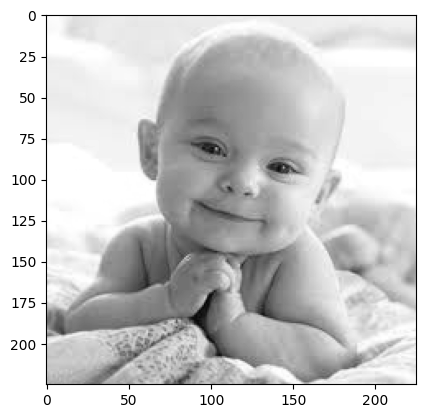

In [4]:
#if you have matplotlib installed then
plt.imshow(gray_img, cmap='gray')

# or display the gray image using OpenCV
# cv2.imshow('Test Imag', gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [5]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

In [19]:
# Download the Haar cascade XML file
import urllib.request

In [20]:
url = 'https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml'
filename = 'haarcascade_frontalface_default.xml'

urllib.request.urlretrieve(url, filename)

# Load the cascade classifier
haar_face_cascade = cv2.CascadeClassifier(filename)

In [21]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

In [22]:
#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


In [23]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

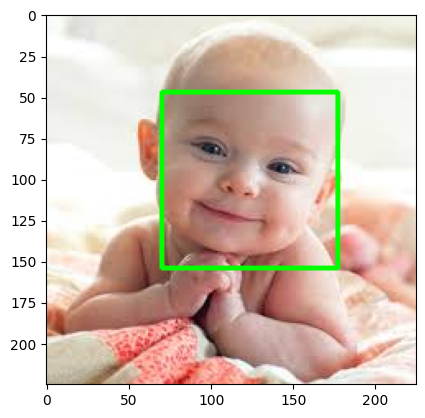

In [24]:
#conver image to RGB and show image
plt.imshow(convertToRGB(test1))

In [25]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img_copy

In [28]:
#load another image
test2 = cv2.imread('data/test3.jpg')

In [30]:
test2 = cv2.imread('test3.jpg')

if test2 is not None:
    faces_detected_img = detect_faces(haar_face_cascade, test2)
else:
    print("Error: Unable to load the image.")

In [31]:
#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

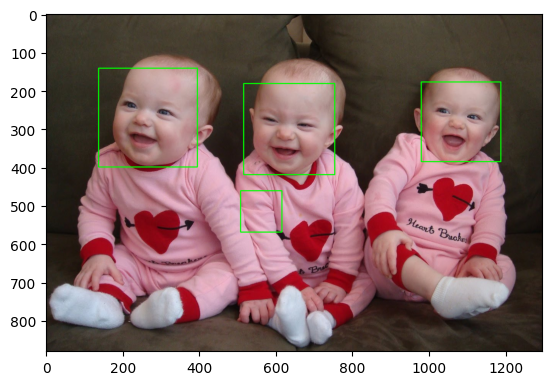

In [32]:
#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

In [35]:
#load another image
test3 = cv2.imread('test5.jpg')

In [36]:
if test3 is not None:
    faces_detected_img = detect_faces(haar_face_cascade, test2)
else:
    print("Error: Unable to load the image.")

In [37]:
#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test3)

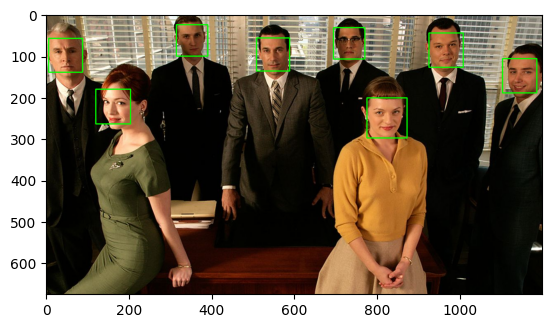

In [38]:
#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))